## Module Installs

In [1]:
################ NOTE ##################
# install modelules/ libraries if needed
#install one at a time, not needed after installation
########################################

# pip install cufflinks

In [2]:
# pip install plotly

In [3]:
#install the folling in Conda
# conda install -c plotly plotly-orca

## Import Dependencies

In [4]:
######## dependencies ###############
%matplotlib notebook
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

import pandas as pd
import numpy as np

import time
import datetime 

from scipy.stats import linregress
import scipy.stats as st

import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px

# from sklearn.linear_model import LinearRegression


pd.set_option('mode.chained_assignment', None)

## Initial DataFrame from CSV

In [5]:
#read csv
csv_path = "../Resources/big_five_stocks.csv"
stock_df = pd.read_csv(csv_path, encoding="utf-8")

#rename the date column 
astock = stock_df.rename( columns={'Unnamed: 0':'date'}, inplace=False )

#format the date column to be recognized as a datetime object
astock['Formatted Date'] = pd.to_datetime(astock['date'])

#isolate Year, Month, and Day into separate columns
astock['Month'] = astock['Formatted Date'].map(lambda x: x.month)
astock['Year'] = astock['Formatted Date'].map(lambda x: x.year)
astock['Day'] = astock['Formatted Date'].map(lambda x: x.day)

#Filter down to last 10 years
filterstock = astock[(astock['Year'] >= 2009) & (astock['Year'] <= 2019)]
filterstock.head()

,date,name,open,close,high,low,volume,Formatted Date,Month,Year,Day
26437,2009-01-02,AAPL,12.23,12.96,13.01,12.17,26964210.0,2009-01-02,1,2009,2
26438,2009-01-02,AMZN,51.10,54.36,54.53,51.07,7296667.0,2009-01-02,1,2009,2
26439,2009-01-02,GOOGL,154.01,160.66,160.91,152.75,3617574.0,2009-01-02,1,2009,2
26440,2009-01-02,^IXIC,1578.87,1632.21,1635.83,1572.04,0.0,2009-01-02,1,2009,2
26441,2009-01-02,MSFT,19.54,20.33,20.40,19.37,50121848.0,2009-01-02,1,2009,2


In [6]:
#isolate only useful information
organizedstock = filterstock[['name','Year','Month', 'Day', 'open','close','high','low', 'volume']]

#sort by name and date to organize our stock data chronologically
sortedstock = organizedstock.sort_values(by=['name', 'Year', 'Month', 'Day'])
sortedstock

,name,Year,Month,Day,open,close,high,low,volume
26437,AAPL,2009,1,2,12.23,12.96,13.01,12.17,26964210.0
26446,AAPL,2009,1,5,13.30,13.51,13.74,13.24,42458780.0
26448,AAPL,2009,1,6,13.71,13.29,13.88,13.20,46149128.0
26452,AAPL,2009,1,7,13.09,13.00,13.21,12.89,27042958.0
26458,AAPL,2009,1,8,12.92,13.24,13.31,12.86,24052284.0
...,...,...,...,...,...,...,...,...,...
41630,^IXIC,2019,8,19,8006.18,8002.81,8026.75,7974.36,0.0
41636,^IXIC,2019,8,20,7989.36,7948.56,8010.58,7948.09,0.0
41645,^IXIC,2019,8,21,8017.07,8020.21,8036.94,7998.50,0.0
41651,^IXIC,2019,8,22,8038.79,7991.39,8048.58,7937.13,0.0


## Stock Volume

In [7]:
# Month list
months = [1,2,3,4,5,6,7,8,9,10,11,12]

#For loop to get total sum of vol by month
for month in months:
    totalvolbymo = sortedstock.loc[sortedstock['Month'] == month].groupby('name')['volume'].sum()
    print(totalvolbymo)

name
AAPL     7.236981e+09
AMZN     1.359727e+09
FB       5.719159e+09
GOOGL    6.494569e+08
MSFT     1.134852e+10
^IXIC    0.000000e+00
Name: volume, dtype: float64
name
AAPL     6.085345e+09
AMZN     1.276771e+09
FB       4.626707e+09
GOOGL    5.584776e+08
MSFT     9.235426e+09
^IXIC    0.000000e+00
Name: volume, dtype: float64
name
AAPL     6.244181e+09
AMZN     1.189071e+09
FB       4.790840e+09
GOOGL    5.962936e+08
MSFT     9.900353e+09
^IXIC    0.000000e+00
Name: volume, dtype: float64
name
AAPL     5.787338e+09
AMZN     1.243370e+09
FB       5.316049e+09
GOOGL    6.113509e+08
MSFT     1.045622e+10
^IXIC    0.000000e+00
Name: volume, dtype: float64
name
AAPL     6.039379e+09
AMZN     1.004306e+09
FB       5.335489e+09
GOOGL    5.096403e+08
MSFT     9.584783e+09
^IXIC    0.000000e+00
Name: volume, dtype: float64
name
AAPL     6.149316e+09
AMZN     9.685126e+08
FB       4.537416e+09
GOOGL    5.212479e+08
MSFT     1.008460e+10
^IXIC    0.000000e+00
Name: volume, dtype: float64
name

## Open and Close Dates by Month

In [8]:
#group by name year and month
groupedstock = sortedstock.groupby(['name','Year','Month'])

#isolate the lowest day available for each month by year and name
firstday = groupedstock['Day'].min()

#isolate the highest day available for each month by year and name
lastday = groupedstock['Day'].max()

In [9]:
#create the initial dataframe off the firstday values
summary = pd.DataFrame(firstday)

#add a column to house the lastday values
summary['Last Day'] = lastday
summary.reset_index()

,name,Year,Month,Day,Last Day
0,AAPL,2009,1,2,30
1,AAPL,2009,2,2,27
2,AAPL,2009,3,2,31
3,AAPL,2009,4,1,30
4,AAPL,2009,5,1,29
...,...,...,...,...,...
723,^IXIC,2019,4,1,30
724,^IXIC,2019,5,1,31
725,^IXIC,2019,6,3,28
726,^IXIC,2019,7,1,31


## Merging DataFrames

In [10]:
#dataframe merging: summary and sorted stock 
mergeddf = pd.merge(summary, sortedstock, on=['name','Year','Month','Day'])

#reorganizing data for readibility
cleandf = mergeddf[['name','Year','Month','Day','Last Day','open']]

#merge the newly create dataframe with the original on the closing date to isolate the closing date values for each close date of each month by year and name
twomerge = pd.merge(cleandf, sortedstock, left_on=["Last Day", 'name','Year','Month'], right_on=["Day", 'name','Year','Month'])

#Reorganizing column names for readibility
# cleanmerge = twomerge[['name','Year','Month','Day_x','Last Day','open_x','close']]
cleanmerge = twomerge[['name','Year','Month','Day_x','Last Day','open_x','close', 'high', 'low']]

#cleaning column names
openclosedf = cleanmerge.rename( columns={'name':'Name', 'Day_x':'First Day', 'open_x':'Open'}, inplace=False )

#Printing
openclosedf



,Name,Year,Month,First Day,Last Day,Open,close,high,low
0,AAPL,2009,1,2,30,12.23,12.88,13.37,12.86
1,AAPL,2009,2,2,27,12.71,12.76,13.04,12.52
2,AAPL,2009,3,2,31,12.57,15.02,15.35,15.00
3,AAPL,2009,4,1,30,14.86,17.98,18.14,17.85
4,AAPL,2009,5,1,29,17.97,19.40,19.41,19.12
...,...,...,...,...,...,...,...,...,...
723,^IXIC,2019,4,1,30,7800.24,8095.39,8124.61,8050.55
724,^IXIC,2019,5,1,31,8132.93,7453.15,7506.86,7448.23
725,^IXIC,2019,6,3,28,7441.22,8006.24,8010.15,7961.46
726,^IXIC,2019,7,1,31,8145.85,8175.42,8299.83,8110.02


## Percent Change

In [11]:
# Calculate percent change
openclosedf['Percent Change (%)'] = round(((openclosedf['close']-openclosedf['Open'])/openclosedf['Open'])*100,2)
openclosedf['Date'] = pd.to_datetime(openclosedf[['Year', 'Month']].assign(DAY=1))

# create data frames for each ticker name
AAPL_df = openclosedf.loc[openclosedf['Name'] ==  'AAPL']
AMZN_df = openclosedf.loc[openclosedf['Name'] ==  'AMZN']
FB_df = openclosedf.loc[openclosedf['Name'] ==  'FB']
GOOGL_df = openclosedf.loc[openclosedf['Name'] ==  'GOOGL']
MSFT_df = openclosedf.loc[openclosedf['Name'] ==  'MSFT']
IXIC_df = openclosedf.loc[openclosedf['Name'] ==  '^IXIC']


In [12]:
#Test Print
AAPL_df

,Name,Year,Month,First Day,Last Day,Open,close,high,low,Percent Change (%),Date
0,AAPL,2009,1,2,30,12.23,12.88,13.37,12.86,5.31,2009-01-01
1,AAPL,2009,2,2,27,12.71,12.76,13.04,12.52,0.39,2009-02-01
2,AAPL,2009,3,2,31,12.57,15.02,15.35,15.00,19.49,2009-03-01
3,AAPL,2009,4,1,30,14.86,17.98,18.14,17.85,21.00,2009-04-01
4,AAPL,2009,5,1,29,17.97,19.40,19.41,19.12,7.96,2009-05-01
...,...,...,...,...,...,...,...,...,...,...,...
123,AAPL,2019,4,1,30,191.64,200.67,203.40,199.11,4.71,2019-04-01
124,AAPL,2019,5,1,31,209.88,175.07,177.99,174.99,-16.59,2019-05-01
125,AAPL,2019,6,3,28,175.60,197.92,199.50,197.05,12.71,2019-06-01
126,AAPL,2019,7,1,31,203.17,213.04,221.37,211.30,4.86,2019-07-01


## Percent Change Over Time

<IPython.core.display.Javascript object>


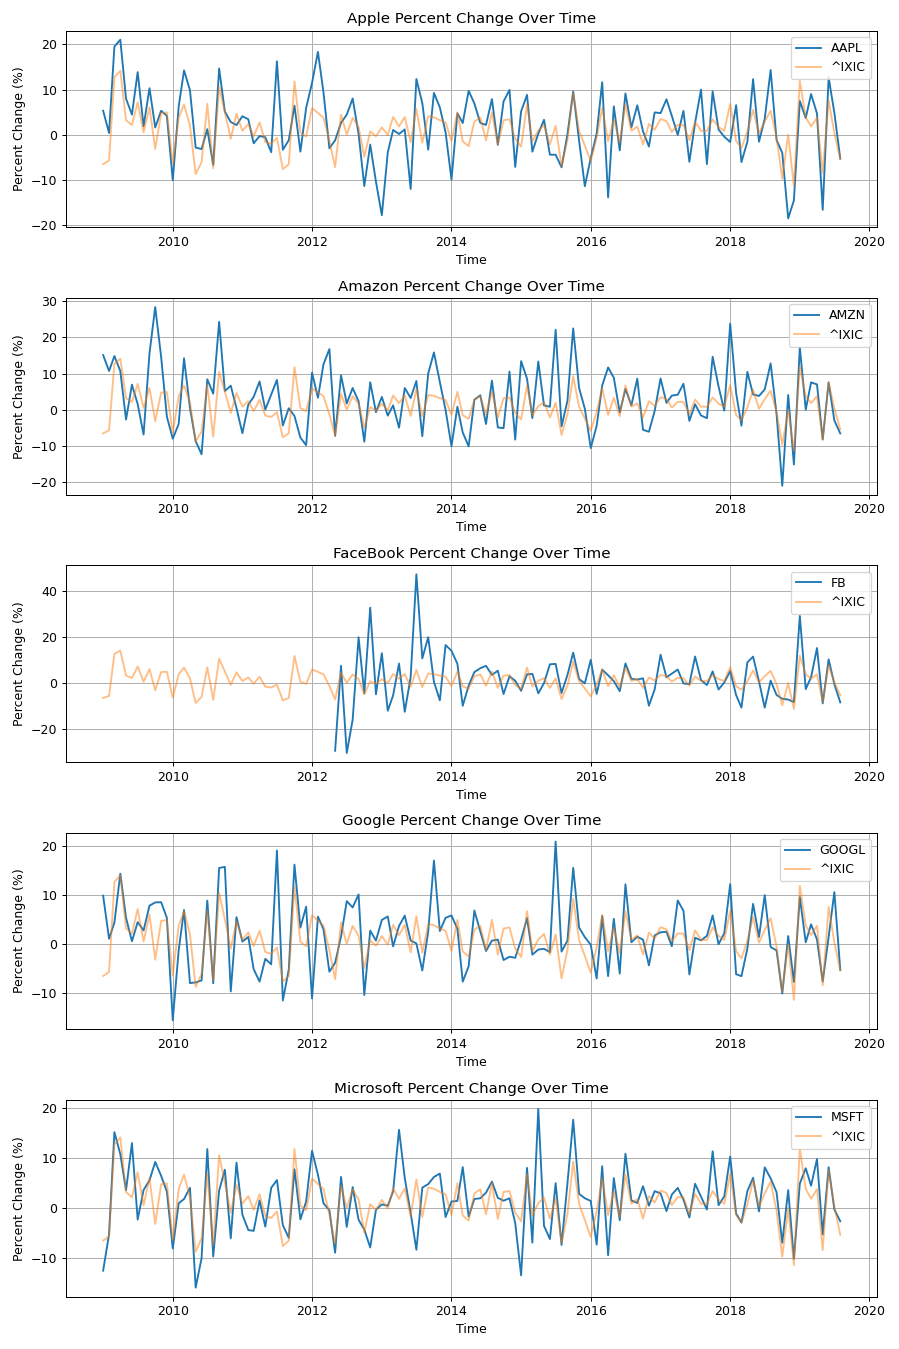

In [13]:
# create 5 subplots comparing each stock to the NASDAQ index
fig, ax = plt.subplots(5)
ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]
ax4 = ax[3]
ax5 = ax[4]
fig.set_figwidth(10)
fig.set_figheight(15)

# plot each stock to a subplot
ax1.plot(AAPL_df['Date'], AAPL_df['Percent Change (%)'],label = "AAPL" )
ax2.plot(AMZN_df['Date'], AMZN_df['Percent Change (%)'],label = "AMZN")
ax3.plot(FB_df['Date'], FB_df['Percent Change (%)'],label = "FB")
ax4.plot(GOOGL_df['Date'], GOOGL_df['Percent Change (%)'],label = "GOOGL")
ax5.plot(MSFT_df['Date'], MSFT_df['Percent Change (%)'],label = "MSFT")

# plot the NASDAQ index to each subplot
ax1.plot(IXIC_df['Date'], IXIC_df['Percent Change (%)'], label="^IXIC", alpha=0.5)
ax2.plot(IXIC_df['Date'], IXIC_df['Percent Change (%)'], label="^IXIC", alpha=0.5)
ax3.plot(IXIC_df['Date'], IXIC_df['Percent Change (%)'], label="^IXIC", alpha=0.5)
ax4.plot(IXIC_df['Date'], IXIC_df['Percent Change (%)'], label="^IXIC", alpha=0.5)
ax5.plot(IXIC_df['Date'], IXIC_df['Percent Change (%)'], label="^IXIC", alpha=0.5)

# add labels and title for each subplot
ax1.set(xlabel='Time', ylabel='Percent Change (%)',
       title='Apple Percent Change Over Time')
ax1.grid()


ax2.set(xlabel='Time', ylabel='Percent Change (%)',
       title='Amazon Percent Change Over Time')
ax2.grid()


ax3.set(xlabel='Time', ylabel='Percent Change (%)',
       title='FaceBook Percent Change Over Time')
ax3.grid()


ax4.set(xlabel='Time', ylabel='Percent Change (%)',
       title='Google Percent Change Over Time')
ax4.grid()


ax5.set(xlabel='Time', ylabel='Percent Change (%)',
       title='Microsoft Percent Change Over Time')
ax5.grid()

# add legend to each subplot
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax5.legend(loc="upper right")

plt.tight_layout()

plt.show()
plt.savefig('pct_changeV1.1.png')

## Percent Change Over Time (Using Plotly)

In [27]:
# dataframe of a wide format
openclosedf['Date']=openclosedf.index

#setting colors and creating figure
colors = px.colors.qualitative.Plotly
fig = go.Figure()

# setting x and Y Axis
x_aapl = AAPL_df['Date']
y_aapl = AAPL_df['Percent Change (%)']

x_amzn = AMZN_df['Date']
y_amzn =AMZN_df['Percent Change (%)']

x_fb = FB_df['Date']
y_fb = FB_df['Percent Change (%)']

x_goog = GOOGL_df['Date']
y_goog = GOOGL_df['Percent Change (%)']

x_msft = MSFT_df['Date']
y_msft =MSFT_df['Percent Change (%)']

x_ixic = IXIC_df['Date']
y_ixic = IXIC_df['Percent Change (%)']


#plotting
fig.add_traces(go.Scatter(x=x_aapl, y = y_aapl, mode = 'lines', name = 'AAPL', line=dict(color=colors[0])))
fig.add_traces(go.Scatter(x=x_amzn, y =y_amzn , mode = 'lines', name = 'AMZN', line=dict(color=colors[1])))
fig.add_traces(go.Scatter(x=x_fb, y =y_fb , mode = 'lines', name = 'FB', line=dict(color=colors[2])))
fig.add_traces(go.Scatter(x=x_goog, y =y_goog , mode = 'lines', name = 'GOOGL', line=dict(color=colors[3])))
fig.add_traces(go.Scatter(x=x_msft, y =y_msft, mode = 'lines', name = 'MSFT', line=dict(color=colors[4])))
fig.add_traces(go.Scatter(x=x_ixic, y = y_ixic, mode = 'lines', name = 'IXIC', line=dict(color=colors[5])))

#Labeling the Plot
fig.update_layout(title="Percent Over time (Interactive Plot)",
                  xaxis_title='Date',
                  yaxis_title='Percent Change (%)',
                  legend_title="Company",
                  font=dict(family="Aerial",
                            size=13,
                            color="Black")
                  )

# Zoom Slider
fig.update_xaxes(
    rangeslider_visible=True,
    tickformatstops = [
        dict(dtickrange=[None, 1000], value="%H:%M:%S.%L ms"),
        dict(dtickrange=[1000, 60000], value="%H:%M:%S s"),
        dict(dtickrange=[60000, 3600000], value="%H:%M m"),
        dict(dtickrange=[3600000, 86400000], value="%H:%M h"),
        dict(dtickrange=[86400000, 604800000], value="%e. %b d"),
        dict(dtickrange=[604800000, "M1"], value="%e. %b w"),
        dict(dtickrange=["M1", "M12"], value="%b '%y M"),
        dict(dtickrange=["M12", None], value="%Y Y")
    ]
)


#printing
fig.show()

# #Outputting the image and saving the image to an external file as a png
# #IMAGES CAN BE SAVED VIA THE PLOTLY GRAPHS

# if not os.path.exists("images"):
#     os.mkdir("images")
    
# fig.write_image("images/fig1.png")

## Average Percent Change Over Time

In [28]:
# calculate the mean percent change for each Big 5 company
AAPL_avg = AAPL_df['Percent Change (%)'].mean()
AMZN_avg = AMZN_df['Percent Change (%)'].mean()
FB_avg = FB_df['Percent Change (%)'].mean()
GOOGL_avg = GOOGL_df['Percent Change (%)'].mean()
MSFT_avg = MSFT_df['Percent Change (%)'].mean()
IXIC_avg = IXIC_df['Percent Change (%)'].mean()

# put the percent averages in a list for plotting
pc_avg = [AAPL_avg, AMZN_avg, FB_avg, GOOGL_avg, MSFT_avg, IXIC_avg]

# put the names in a list for plotting
names = ["Apple", "Amazon", "Facebook", "Google", "Microsoft", "Index"]

# Printing
pc_avg

[2.0646875,
 3.11140625,
 2.110340909090911,
 1.6932812500000005,
 1.6717968749999998,
 1.1743749999999997]

In [29]:
# Build bar graph comparing % change average for 10 years
fig = go.Figure()
fig.add_trace(go.Bar(x=names, y=pc_avg, marker_color=px.colors.qualitative.Plotly))

# Labeling the Plot
fig.update_layout(title="Average Percent Change Over Time ",
                  xaxis_title='Company',
                  yaxis_title='Percent Change (%)',
                  title_x=.5,
                  font=dict(family="Aerial",
                            size=13,
                            color="Black")
                  )

# show the plot
fig.show()

In [30]:
# pie plot interactive plot: --> https://plotly.com/python/pie-charts/

# sort the total purchase volume by company name, reset index, and round the value
purchase_vol = round(sortedstock.groupby("name", as_index = False).sum(), 0)

# remove the index from the df since volume is 0
purchase_vol = purchase_vol.loc[purchase_vol['name'] != "^IXIC"]

# build pie chart showing volume purchase of big 5 over the last 10 years
fig = go.Figure(data=[go.Pie(labels=names, values=purchase_vol["volume"], hole=.3)])

# labeling the plot
fig.update_layout(title="Purchase Volume % Over Ten Years for Big 5", 
                  title_x=.5,
                  legend_title="Company",
                  font=dict(family="Aerial",
                            size=13,
                            color="Black")
                  )
# show the plot
fig.show()



## Min and Max Summaries

In [31]:
# calculate maximum and minimum percent change
max_pc = openclosedf["Percent Change (%)"].max()
max_info = openclosedf.loc[openclosedf["Percent Change (%)"] == max_pc]

min_pc = openclosedf["Percent Change (%)"].min()
min_info = openclosedf.loc[openclosedf["Percent Change (%)"] == min_pc]

#loop through each company to calculate the max and min for each
co_df = [AAPL_df, AMZN_df, FB_df, GOOGL_df, MSFT_df, IXIC_df]

for df in co_df:
    df_max_pc = df["Percent Change (%)"].max()
    df_min_pc = df["Percent Change (%)"].min()
    print(df_max_pc, df_min_pc)

21.0 -18.48
28.4 -20.97
47.38 -30.53
20.94 -15.54
19.8 -15.88
14.12 -11.37


In [32]:
# set empty lists to put max and min into
DF_max_info = []
DF_min_info = []
# max_min = []

# loop through each company to calculate the max and min, place in new list with all df info from that value
for df in co_df:
    df_max_pc = df["Percent Change (%)"].max()
    df_min_pc = df["Percent Change (%)"].min()
    df_max_info = openclosedf.loc[openclosedf["Percent Change (%)"] == df_max_pc]
    df_min_info = openclosedf.loc[openclosedf["Percent Change (%)"] == df_min_pc]
    
    DF_max_info.append(df_max_info)
    DF_min_info.append(df_min_info)
                 


In [33]:
# print the max list
DF_max_info

[   Name  Year  Month  First Day  Last Day   Open  close   high    low  \
 3  AAPL  2009      4          1        30  14.86  17.98  18.14  17.85   
 
    Percent Change (%)  Date  
 3                21.0     3  ,
      Name  Year  Month  First Day  Last Day   Open   close   high     low  \
 137  AMZN  2009     10          1        30  92.53  118.81  122.9  118.21   
 
      Percent Change (%)  Date  
 137                28.4   137  ,
     Name  Year  Month  First Day  Last Day   Open  close   high    low  \
 270   FB  2013      7          1        31  24.97   36.8  38.31  36.33   
 
      Percent Change (%)  Date  
 270               47.38   270  ,
       Name  Year  Month  First Day  Last Day    Open  close   high    low  \
 422  GOOGL  2015      7          1        31  543.66  657.5  665.0  657.2   
 
      Percent Change (%)  Date  
 422               20.94   422  ,
      Name  Year  Month  First Day  Last Day  Open  close   high   low  \
 547  MSFT  2015      4          1        30

In [34]:
# print the min list
DF_min_info

[     Name  Year  Month  First Day  Last Day    Open   close    high     low  \
 118  AAPL  2018     11          1        30  219.05  178.58  180.33  177.03   
 
      Percent Change (%)  Date  
 118              -18.48   118  ,
      Name  Year  Month  First Day  Last Day     Open    close     high  \
 245  AMZN  2018     10          1        31  2021.99  1598.01  1623.91   
 
          low  Percent Change (%)  Date  
 245  1565.09              -20.97   245  ,
     Name  Year  Month  First Day  Last Day   Open  close   high    low  \
 258   FB  2012      7          2        31  31.25  21.71  23.37  21.61   
 
      Percent Change (%)  Date  
 258              -30.53   258  ,
       Name  Year  Month  First Day  Last Day    Open   close   high     low  \
 356  GOOGL  2010      1          4        29  313.73  264.97  270.5  262.81   
 
      Percent Change (%)  Date  
 356              -15.54   356  ,
      Name  Year  Month  First Day  Last Day   Open  close   high    low  \
 488  MSFT

## Combining Max and Min Values to DataFrame

In [35]:
# combine the max info into a single df
pc_max=pd.concat([DF_max_info[0],DF_max_info[1],DF_max_info[2],DF_max_info[3],DF_max_info[4],DF_max_info[5]],axis=0)
pc_max

,Name,Year,Month,First Day,Last Day,Open,close,high,low,Percent Change (%),Date
3,AAPL,2009,4,1,30,14.86,17.98,18.14,17.85,21.00,3
137,AMZN,2009,10,1,30,92.53,118.81,122.90,118.21,28.40,137
270,FB,2013,7,1,31,24.97,36.80,38.31,36.33,47.38,270
422,GOOGL,2015,7,1,31,543.66,657.50,665.00,657.20,20.94,422
547,MSFT,2015,4,1,30,40.60,48.64,49.54,48.60,19.80,547
603,^IXIC,2009,4,1,30,1504.87,1717.30,1753.48,1710.15,14.12,603


In [36]:
# combine the min info into a single df
pc_min=pd.concat([DF_min_info[0],DF_min_info[1],DF_min_info[2],DF_min_info[3],DF_min_info[4],DF_min_info[5]],axis=0)
pc_min

,Name,Year,Month,First Day,Last Day,Open,close,high,low,Percent Change (%),Date
118,AAPL,2018,11,1,30,219.05,178.58,180.33,177.03,-18.48,118
245,AMZN,2018,10,1,31,2021.99,1598.01,1623.91,1565.09,-20.97,245
258,FB,2012,7,2,31,31.25,21.71,23.37,21.61,-30.53,258
356,GOOGL,2010,1,4,29,313.73,264.97,270.50,262.81,-15.54,356
488,MSFT,2010,5,3,28,30.67,25.80,26.12,25.66,-15.88,488
719,^IXIC,2018,12,3,31,7486.13,6635.28,6659.96,6570.06,-11.37,719


## Open vs. Close Daily Differences

In [37]:
# Open vs Close daily difference candlestick chart: --> https://plotly.com/python/candlestick-charts/

# setting colors and creating figure
colors = px.colors.qualitative.Plotly
fig = go.Figure()

#plotting
fig.add_traces(go.Candlestick(x = AAPL_df['Date'], open = AAPL_df['Open'],
                              high = AAPL_df['high'], low = AAPL_df['low'], 
                              close = AAPL_df['close'], name = 'AAPL',
                             increasing_line_color = 'blue', decreasing_line_color = 'red'))

fig.add_traces(go.Candlestick(x = AMZN_df['Date'], open = AMZN_df['Open'],
                              high = AMZN_df['high'], low = AMZN_df['low'], 
                              close = AMZN_df['close'], name = 'AMZN',
                             increasing_line_color = 'cyan', decreasing_line_color = 'gray'))

fig.add_traces(go.Candlestick(x=FB_df['Date'],open=FB_df['Open'],
                              high=FB_df['high'],low=FB_df['low'], 
                              close=FB_df['close'], name = 'FB',
                             increasing_line_color= 'green', decreasing_line_color= 'brown'))

fig.add_traces(go.Candlestick(x=GOOGL_df['Date'],open=GOOGL_df['Open'],
                              high=GOOGL_df['high'],low=GOOGL_df['low'], 
                              close=GOOGL_df['close'], name = 'GOOGL',
                             increasing_line_color= 'orange', decreasing_line_color= 'black'))

fig.add_traces(go.Candlestick(x=MSFT_df['Date'],open=MSFT_df['Open'],
                              high=MSFT_df['high'],low=MSFT_df['low'], 
                              close=MSFT_df['close'], name = 'MSFT',
                             increasing_line_color= 'purple', decreasing_line_color= 'goldenrod'))

fig.add_traces(go.Candlestick(x=IXIC_df['Date'],open=IXIC_df['Open'],
                              high=IXIC_df['high'],low=IXIC_df['low'], 
                              close=IXIC_df['close'], name = 'IXIC',
                             increasing_line_color= 'cyan', decreasing_line_color= 'lightpink'))


# Labeling the Plot
fig.update_layout(title="Open Vs Close Daily Difference (Interactive Plot)",
                  xaxis_title='Date',
                  yaxis_title='Stock Value',
                  title_x=.5,
                  legend_title="Company",
                  font=dict(family="Aerial", size=13, color="Black")
                  )



#printing
fig.show()

## ScatterPlot  (Closing Daily Value Over Time)

In [38]:
# setting colors and creating figure
colors = px.colors.qualitative.Plotly
fig = go.Figure()

#plotting
fig.add_traces(go.Scatter(x=AAPL_df['Date'], y = AAPL_df['close'], 
                          mode = 'markers', name = 'AAPL', line=dict(color=colors[0])))
fig.add_traces(go.Scatter(x=AMZN_df['Date'], y = AMZN_df['close'], 
                          mode = 'markers', name = 'AMZN', line=dict(color=colors[1])))
fig.add_traces(go.Scatter(x=FB_df['Date'], y = FB_df['close'], 
                          mode = 'markers', name = 'FB', line=dict(color=colors[2])))
fig.add_traces(go.Scatter(x=GOOGL_df['Date'], y = GOOGL_df['close'], 
                          mode = 'markers', name = 'GOOGL', line=dict(color=colors[3])))
fig.add_traces(go.Scatter(x=MSFT_df['Date'], y = MSFT_df['close'], 
                          mode = 'markers', name = 'MSFT', line=dict(color=colors[4])))
fig.add_traces(go.Scatter(x=IXIC_df['Date'], y = IXIC_df['close'], 
                          mode = 'markers', name = 'IXIC', line=dict(color=colors[5])))


# Labeling the Plot
fig.update_layout(title="Closing Daily Value (Interactive Plot)",
                  xaxis_title='Date',
                  yaxis_title='Closing',
                  title_x=.5,
                  legend_title="Company",
                  font=dict(family="Aerial", size=13, color="Black")
                  )

#printing
fig.show()



## Linear Regression (Closing over Time)

In [40]:
#REFERENCE
# co_df = [AAPL_df, AMZN_df, FB_df, GOOGL_df, MSFT_df, IXIC_df]
# names = ["Apple", "Amazon", "Facebook", "Google", "Microsoft", "Index"]

#Counter
i=0
# colors = ['red', 'green', 'blue', 'orange', 'yellow', 'pink']

#for loop doing through each dataframe
for df in co_df:
    
    #Converting date-time to serial-time
    df['timestamp']=pd.to_datetime(df['Date'])
    df['serialtime']=[(d-datetime.datetime(1970,1,1)).days for d in df['timestamp']]

    fig = px.scatter(df,x='serialtime',y='close', trendline='ols', trendline_color_override="red")
  

    fig.update_xaxes(tickangle = 45,
                     tickmode = 'array',
                     tickvals = AAPL_df['Date'][0::40],
#                    ticktext= [d.strftime('%Y-%m-%d') for d in datelist])
                     ticktext = AAPL_df['Date']
                     )
  

    # Labeling the Plot
    fig.update_layout(title=f"Close Daily Values ({names[i]}) - Linear Regression",
                      xaxis_title='Date',
                      yaxis_title='Closing',
                      title_x=.5,
                      legend_title="Company",
                      font=dict(family="Aerial", size=13, color="Black")
                      )

    #printing
    fig.show()
    
    i+=1
